In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from mpl_toolkits.mplot3d import Axes3D

# Load dữ liệu đã chuẩn hóa
df = pd.read_csv("C:/Users/ADMIN/Downloads/Data/housing_price_dataset.csv")
df = df[["SquareFeet", "Price"]].head(500)
df

,SquareFeet,Price
0,2126,215355.283618
1,2459,195014.221626
2,1860,306891.012076
3,2294,206786.787153
4,2130,272436.239065
...,...,...
495,2346,279439.984385
496,1127,127174.722595
497,1017,127458.039009
498,2816,356063.829221


In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Chọn các cột cần chuẩn hóa
columns = ["SquareFeet","Price"]

# Chuẩn hóa dữ liệu và gán lại cho DataFrame
df[columns] = scaler.fit_transform(df[columns])


# Chuyển DataFrame thành mảng NumPy
data_array = df.values

# data_array bây giờ là một mảng NumPy chứa dữ liệu từ DataFrame
print(data_array)

[[ 0.16560539 -0.12308047]
 [ 0.75024372 -0.384468  ]
 [-0.30140301  1.05317563]
 [ 0.46055806 -0.23318771]
 [ 0.17262807  0.61042352]
 [ 0.1111796  -0.34341685]
 [ 1.21549645  1.52270165]
 [ 0.0216404  -0.51325183]
 [ 1.06450877  1.96692507]
 [-1.59884363 -1.65731379]
 [-0.99313725 -0.43458976]
 [ 0.36224051  0.36527185]
 [-1.23190846 -1.1920006 ]
 [ 0.79062415  0.07997574]
 [-1.65853643 -1.36905853]
 [ 0.63963647  0.54541622]
 [ 0.16033838 -0.43896681]
 [-0.28209063 -0.66748705]
 [ 1.15053663  0.18362115]
 [-1.58304259 -1.05221814]
 [ 1.14702529  2.32063101]
 [ 0.52727355  0.50142669]
 [-0.46116904 -0.9846205 ]
 [-1.20908474 -0.94063024]
 [ 0.84856128  1.06692661]
 [ 0.71161897  0.65831152]
 [-0.39796489  0.24482091]
 [-1.13534657 -1.75923399]
 [ 0.32186008  0.74500078]
 [-0.13461429  0.20615898]
 [-1.32671467 -1.54441918]
 [ 0.26743429  1.57125077]
 [-1.00542694 -1.89463196]
 [ 0.5360519   1.37391852]
 [-1.77441069 -1.47166965]
 [-1.36885077 -1.24648094]
 [-0.49979379  0.04818681]
 

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


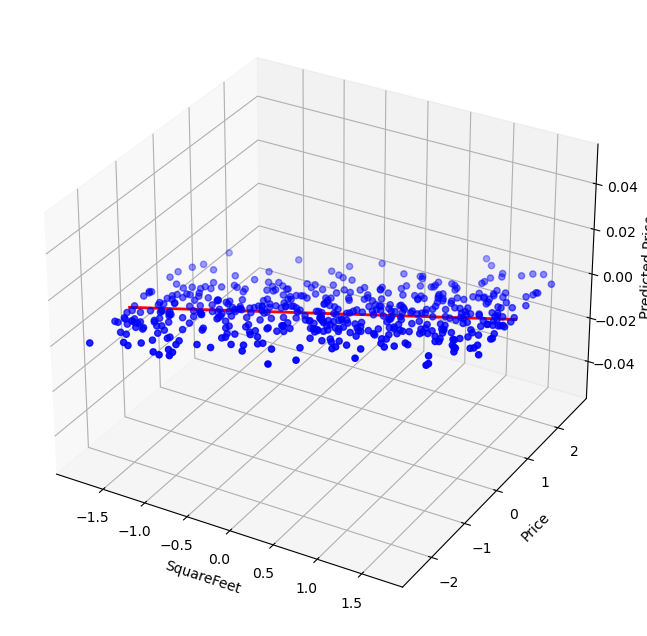

In [137]:
# Tạo mô hình SVR
svr = SVR(kernel='linear')
svr.fit(df[["SquareFeet"]], df["Price"])

# Tạo dữ liệu cho đường biên
xx = np.linspace(df["SquareFeet"].min(), df["SquareFeet"].max(), 100).reshape(-1, 1)
yy = svr.predict(xx)

# Vẽ biểu đồ 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot dữ liệu
ax.scatter(df["SquareFeet"], df["Price"], c='b', marker='o')

# Plot đường biên
ax.plot(xx.flatten(), yy, color='r', linewidth=2)

# Thiết lập các nhãn
ax.set_xlabel('SquareFeet')
ax.set_ylabel('Price')
ax.set_zlabel('Predicted Price')

# Hiển thị biểu đồ
plt.show()

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


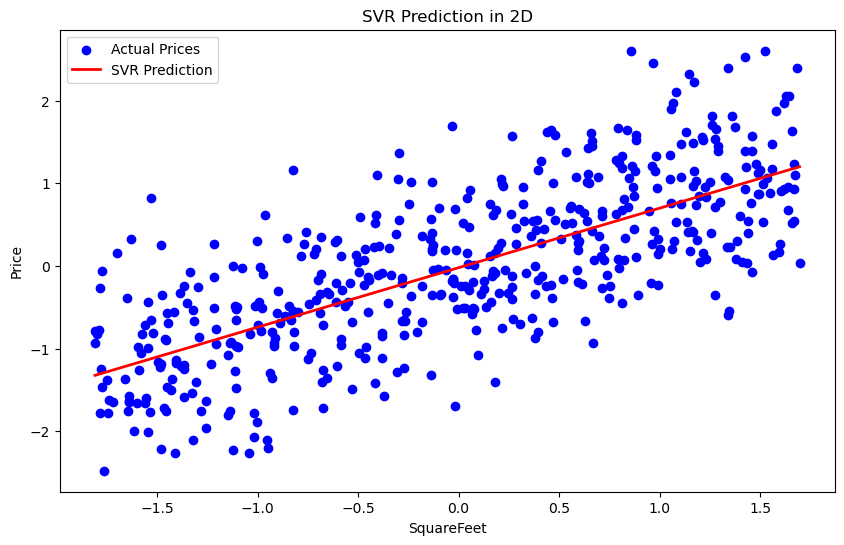

In [138]:
# Tạo mô hình SVR
svr = SVR(kernel='linear')
svr.fit(df[["SquareFeet"]], df["Price"])

# Tạo dữ liệu cho đường biên
xx = np.linspace(df["SquareFeet"].min(), df["SquareFeet"].max(), 100).reshape(-1, 1)
yy = svr.predict(xx)

# Vẽ biểu đồ 2D
plt.figure(figsize=(10, 6))

# Scatter plot dữ liệu
plt.scatter(df["SquareFeet"], df["Price"], c='b', marker='o', label='Actual Prices')

# Plot đường biên
plt.plot(xx.flatten(), yy, color='r', linewidth=2, label='SVR Prediction')

# Thiết lập các nhãn
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.title('SVR Prediction in 2D')
plt.legend()
plt.show()


Text(0, 0.5, 'Price')

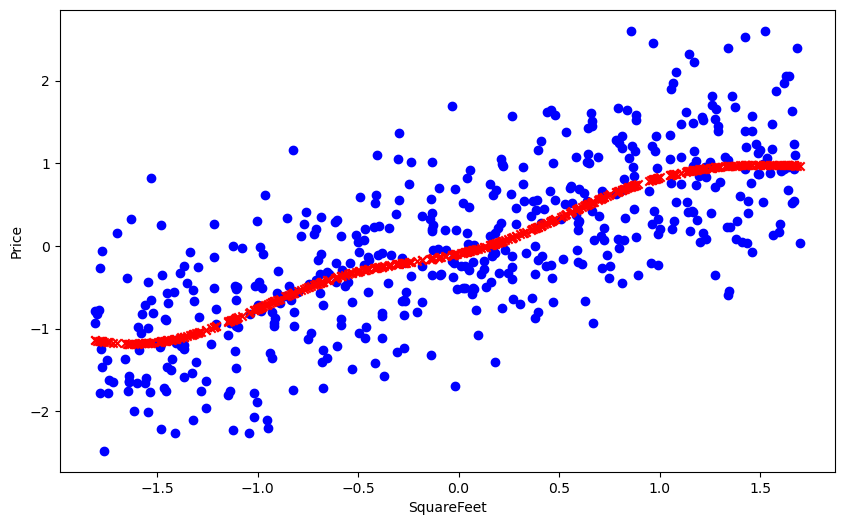

In [139]:


# Tạo mô hình SVR với kernel RBF
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X, y)

# Dự đoán giá trị cho các điểm dữ liệu
y_pred_rbf = svr_rbf.predict(X)

# Trực quan hóa dữ liệu và đường biên
plt.figure(figsize=(10, 6))

# Scatter plot dữ liệu thực tế
plt.scatter(df["SquareFeet"], df["Price"], label='Actual Prices', color='blue')

# Scatter plot dữ liệu dự đoán
plt.scatter(df["SquareFeet"], y_pred_rbf, label='SVR (RBF Kernel) Prediction', color='red', marker='x')

plt.xlabel('SquareFeet')
plt.ylabel('Price')
